# 1. Import module yang dibutuhkan

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# 2. Load Dataset

In [2]:
imagePaths = 'Dataset\\leaf\\'
label_list = ['lime', 'betel']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(100, 32, 32, 3)

# 3. Data Preprocessing

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime' 'lime'
 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel'
 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel'
 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel'
 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel'
 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel' 'betel'
 'betel' 'betel' 'betel' 'betel' 'betel']


In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# 4. Split Dataset

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


# 5. Build CNN Architecture

In [10]:
model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32,32,3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [12]:
# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

# 6. Train Model

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 189ms/step - loss: 0.8412 - accuracy: 0.6125 - val_loss: 2.1004 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 57ms/step - loss: 1.2876 - accuracy: 0.5250 - val_loss: 0.6505 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 52ms/step - loss: 0.7993 - accuracy: 0.5500 - val_loss: 0.7078 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 57ms/step - loss: 0.8119 - accuracy: 0.4875 - val_loss: 0.6958 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 57ms/step - loss: 0.6563 - accuracy: 0.6000 - val_loss: 0.7805 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 56ms/step - loss: 0.7213 - accuracy: 0.5375 - val_loss: 0.7300 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 67ms/step - loss: 0.6829 - accuracy: 0.5625 - val_loss: 0.6363 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

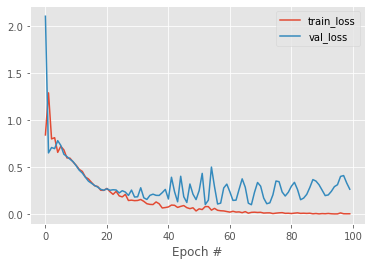

In [15]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

# 7. Evaluate the Model

In [16]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

        lime       0.80      1.00      0.89         8
       betel       1.00      0.83      0.91        12

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



C:\Users\ASUS\AppData\Local\Temp/ipykernel_7624/954476436.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)


In [17]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_betel.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9999498]]


In [18]:
if q_pred<=0.5 :
    target = "Lime"
else :
    target = "Betel"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey()
cv2.destroyWindow('Output')

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:1261: error: (-27:Null pointer) NULL window: 'Output' in function 'cvDestroyWindow'


# 8. Save the model

In [21]:
model.save("nipis_sirih_class_model.h5")